In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
docentes_path = './data/Docentes.csv'
docentes_df = pd.read_csv(docentes_path, encoding='utf-8', delimiter=';')
docentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   APELLIDOS Y NOMBRES   3225 non-null   object
 1   CÓDIGO DOCENTE        3225 non-null   object
 2   FACULTAD              3225 non-null   object
 3   TIPO DOC.             3225 non-null   object
 4   DOC. IDENTIDAD        3225 non-null   int64 
 5   CORREO INSTITUCIONAL  3225 non-null   object
 6   GRADO ACADÉMICO       3225 non-null   object
 7   CATEGORÍA             3225 non-null   object
dtypes: int64(1), object(7)
memory usage: 201.7+ KB


In [49]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

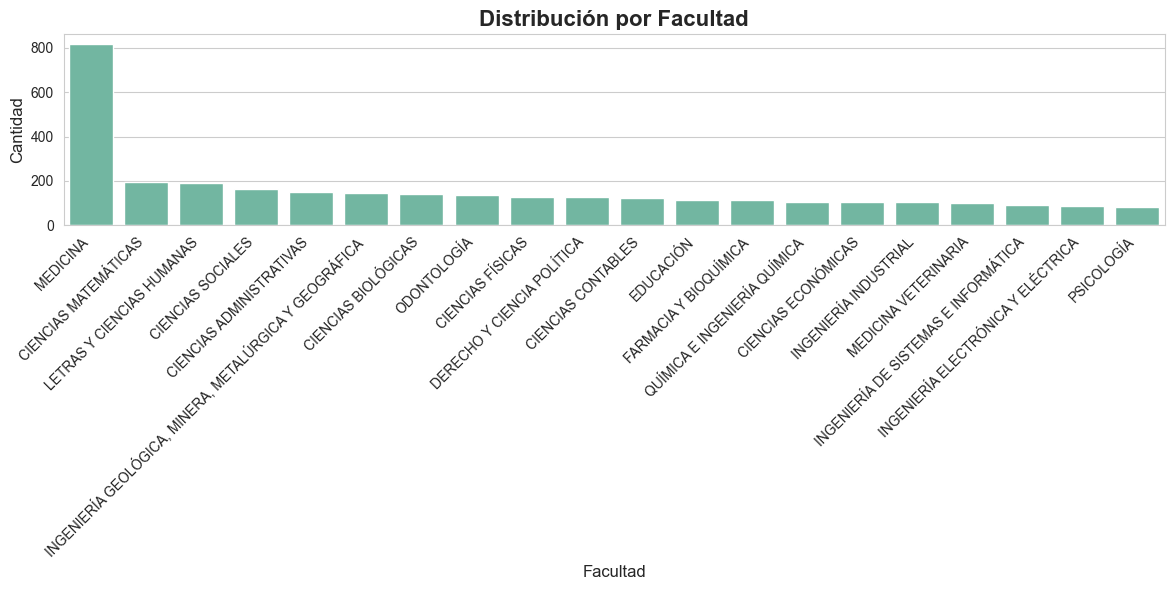

In [50]:
def visualizar_datos(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='FACULTAD', order=df['FACULTAD'].value_counts().index)
    plt.title('Distribución por Facultad', fontsize=16, fontweight='bold')
    plt.xlabel('Facultad', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

visualizar_datos(docentes_df)

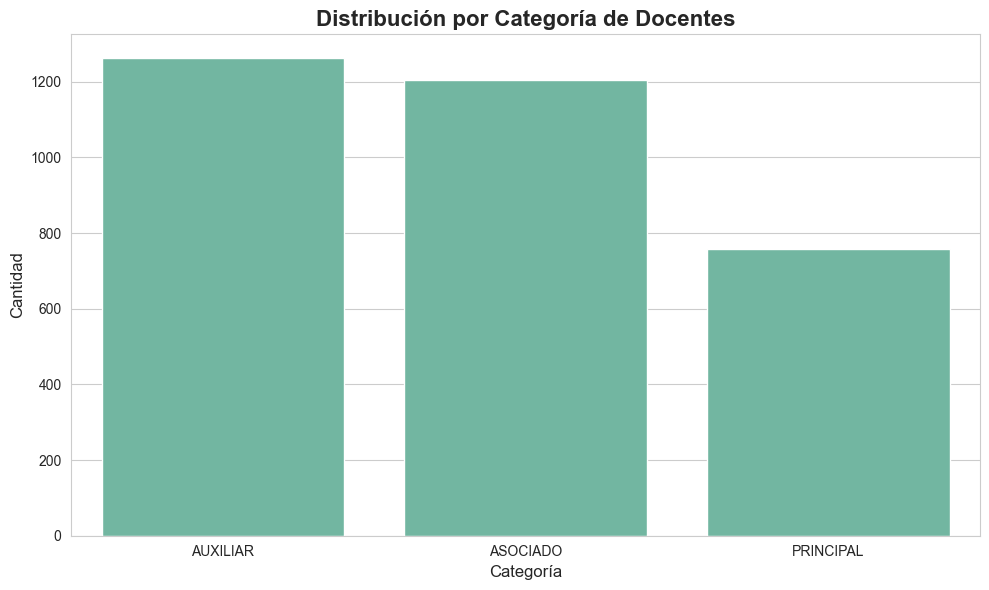

In [51]:
def visualizar_categorias(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='CATEGORÍA', order=df['CATEGORÍA'].value_counts().index)
    plt.title('Distribución por Categoría de Docentes', fontsize=16, fontweight='bold')
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

visualizar_categorias(docentes_df)

C:\Users\Jose\AppData\Local\Temp\ipykernel_15720\2008793836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facultades, x='Cantidad', y='Facultad', palette="coolwarm")


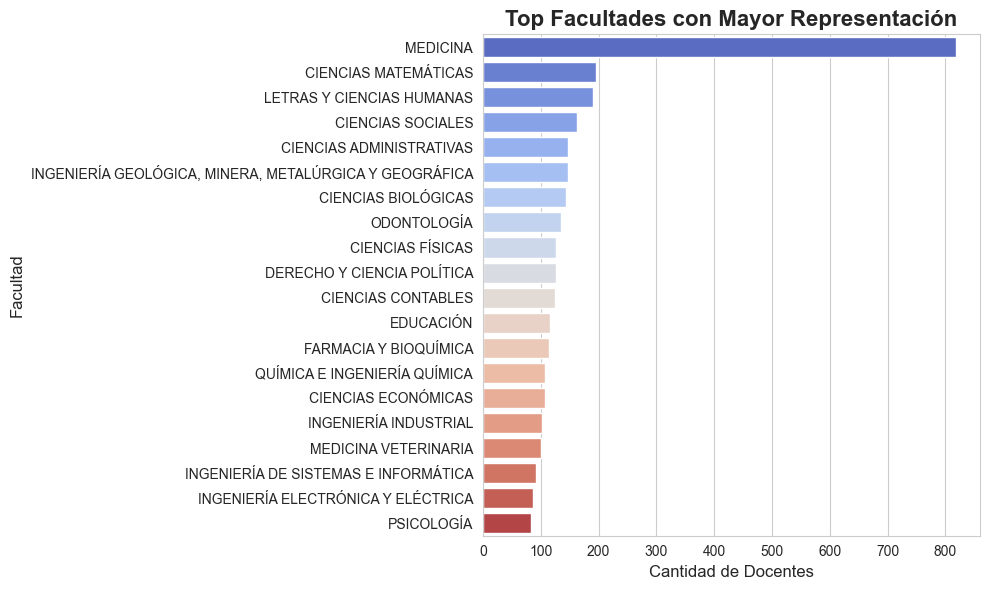

In [52]:
def top_facultades(df):
    facultades = df['FACULTAD'].value_counts().reset_index()
    facultades.columns = ['Facultad', 'Cantidad']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=facultades, x='Cantidad', y='Facultad', palette="coolwarm")
    plt.title('Top Facultades con Mayor Representación', fontsize=16, fontweight='bold')
    plt.xlabel('Cantidad de Docentes', fontsize=12)
    plt.ylabel('Facultad', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

top_facultades(docentes_df)

In [53]:
docentes_df

,APELLIDOS Y NOMBRES,CÓDIGO DOCENTE,FACULTAD,TIPO DOC.,DOC. IDENTIDAD,CORREO INSTITUCIONAL,GRADO ACADÉMICO,CATEGORÍA
0,ACOSTA EVANGELISTA ZULLY LUZ,00037A,MEDICINA,DNI,8199506,zacostae@unmsm.edu.pe,DOCTORADO,PRINCIPAL
1,ALARCON VILLAVERDE JORGE ODON,001201,MEDICINA,DNI,7215467,jalarconv@unmsm.edu.pe,DOCTORADO,PRINCIPAL
2,ALVARADO RIVADENEYRA SILAS HILDELIZA,002615,MEDICINA,DNI,8707064,salvarador@unmsm.edu.pe,MAESTRIA,PRINCIPAL
3,ANGULO SOLIMANO JUAN MANUEL,003654,MEDICINA,DNI,8267785,jangulos@unmsm.edu.pe,DOCTORADO,PRINCIPAL
4,APARICIO PONCE JORGE RENATO,0A1490,MEDICINA,DNI,7837682,japariciop@unmsm.edu.pe,DOCTORADO,PRINCIPAL
...,...,...,...,...,...,...,...,...
3220,SALINAS AZAÑA GILBERTO ANIBAL,089575,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,8105290,gsalinasa@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR
3221,SOBERO RODRIGUEZ FANY YEXENIA,0A0716,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,20120467,fsoberor@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR
3222,TAPIA CARBAJAL JUAN RICARDO,0A9179,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,9454245,jtapiaca@unmsm.edu.pe,MAESTRIA,AUXILIAR
3223,UGAZ CACHAY WINSTON IGNACIO,0A1981,INGENIERÍA DE SISTEMAS E INFORMÁTICA,DNI,40555355,wugazc@unmsm.edu.pe,TITULO UNIVERSITARIO,AUXILIAR


In [54]:
# Crear un nuevo DataFrame para codificación
docentes_codificados_df = docentes_df.copy()# Codificación de datos categóricos

# Codificación de datos categóricos
le_facultad = LabelEncoder()
le_grado = LabelEncoder()
le_categoria = LabelEncoder()

docentes_codificados_df['FACULTAD'] = le_facultad.fit_transform(docentes_df['FACULTAD'])
docentes_codificados_df['GRADO ACADÉMICO'] = le_grado.fit_transform(docentes_df['GRADO ACADÉMICO'])
docentes_codificados_df['CATEGORÍA'] = le_categoria.fit_transform(docentes_df['CATEGORÍA'])

In [55]:
# Separar características (X) y etiqueta (y)
X = docentes_codificados_df[['FACULTAD', 'GRADO ACADÉMICO']]
y = docentes_codificados_df['CATEGORÍA']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos a entrenar
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(random_state=42),
    "Máquina de Soporte Vectorial (SVM)": SVC(random_state=42)
}

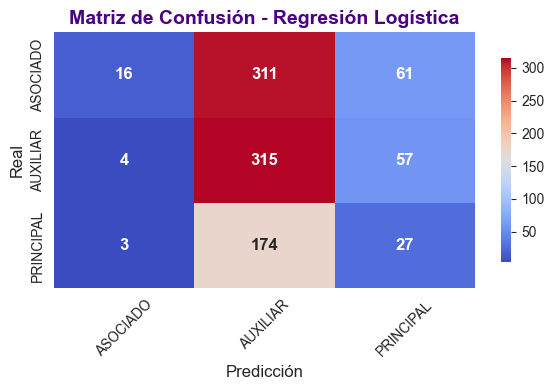

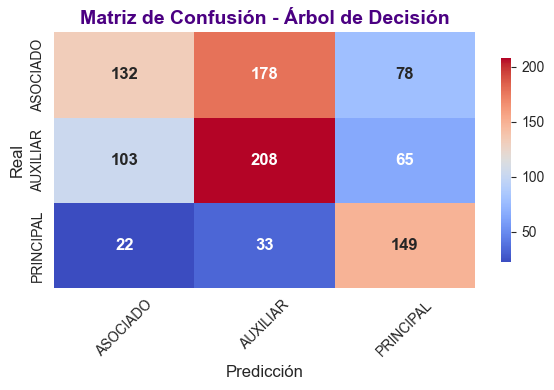

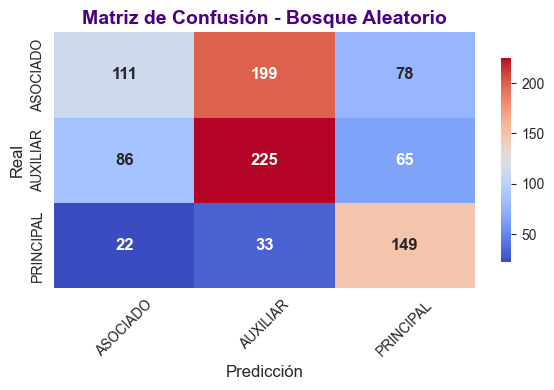

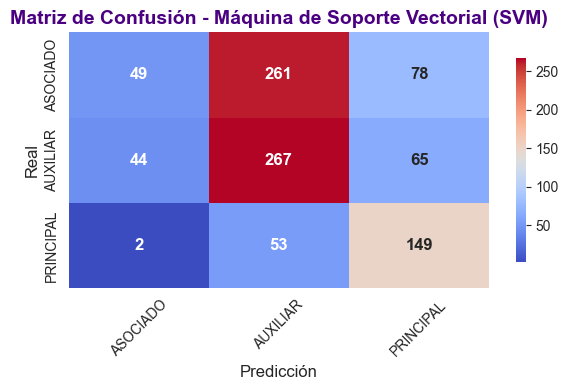

In [56]:
# Entrenar y evaluar modelos con métricas adicionales
resultados_docentes = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Guardar resultados
    resultados_docentes[nombre] = {
        "Exactitud (Accuracy)": accuracy,
        "Precisión": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Reporte de Clasificación": classification_report(y_test, y_pred, output_dict=True),
        "Matriz de Confusión": confusion_matrix(y_test, y_pred)
    }

# Crear un DataFrame con las métricas de rendimiento
metricas_docentes_df = pd.DataFrame({
    nombre: {
        "Exactitud (Accuracy)": datos["Exactitud (Accuracy)"],
        "Precisión": datos["Precisión"],
        "Recall": datos["Recall"],
        "F1-Score": datos["F1-Score"]
    }
    for nombre, datos in resultados_docentes.items()
}).T

for nombre, datos in resultados_docentes.items():
    matriz = datos["Matriz de Confusión"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        matriz,
        annot=True,           # Display values on the heatmap
        fmt='d',              # Integer formatting for values
        cmap='coolwarm',      # Updated color palette
        annot_kws={"size": 12, "weight": "bold"},  # Customize annotation appearance
        xticklabels=le_categoria.classes_, 
        yticklabels=le_categoria.classes_,
        cbar_kws={"shrink": 0.8}  # Adjust color bar size
    )
    plt.title(f"Matriz de Confusión - {nombre}", fontsize=14, fontweight='bold', color="#4B0082")
    plt.xlabel("Predicción", fontsize=12)
    plt.ylabel("Real", fontsize=12)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

In [57]:
metricas_docentes_df

,Exactitud (Accuracy),Precisión,Recall,F1-Score
Regresión Logística,0.369835,0.471022,0.369835,0.271903
Árbol de Decisión,0.505165,0.506233,0.505165,0.493929
Bosque Aleatorio,0.501033,0.501936,0.501033,0.483048
Máquina de Soporte Vectorial (SVM),0.480372,0.492783,0.480372,0.424685


In [58]:
def predecir_con_modelos(modelos, docentes_df, le_facultad, le_grado, le_categoria):
    """
    Pedir datos al usuario, codificarlos y realizar predicciones con todos los modelos.
    """
    print("\nIngrese los datos para realizar una predicción:")
    
    # Pedir entrada al usuario usando los datos originales
    facultad = input(f"Facultad (opciones: {list(docentes_df['FACULTAD'].unique())}): ")
    grado = input(f"Grado Académico (opciones: {list(docentes_df['GRADO ACADÉMICO'].unique())}): ")
    
    # Validar si las entradas están dentro de los valores permitidos
    if facultad not in docentes_df['FACULTAD'].values or grado not in docentes_df['GRADO ACADÉMICO'].values:
        print("\nEntrada no válida. Asegúrese de ingresar valores correctos.")
        return

    # Codificar las entradas del usuario
    facultad_codificada = le_facultad.transform([facultad])[0]
    grado_codificado = le_grado.transform([grado])[0]
    
    # Crear DataFrame de entrada codificada
    entrada_codificada = pd.DataFrame([[facultad_codificada, grado_codificado]], 
                                      columns=['FACULTAD', 'GRADO ACADÉMICO'])

    # Predecir con cada modelo
    print("\nPredicciones con cada modelo:")
    for nombre, modelo in modelos.items():
        prediccion_codificada = modelo.predict(entrada_codificada)
        prediccion_original = le_categoria.inverse_transform(prediccion_codificada)[0]
        print(f"Modelo: {nombre} -> Predicción: {prediccion_original}")

# Uso de la función:
# Asegúrate de que los modelos ya estén entrenados antes de llamar a esta función
predecir_con_modelos(modelos, docentes_df, le_facultad, le_grado, le_categoria)


Ingrese los datos para realizar una predicción:

Predicciones con cada modelo:
Modelo: Regresión Logística -> Predicción: ASOCIADO
Modelo: Árbol de Decisión -> Predicción: ASOCIADO
Modelo: Bosque Aleatorio -> Predicción: AUXILIAR
Modelo: Máquina de Soporte Vectorial (SVM) -> Predicción: AUXILIAR


c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jose\Downloads\bigdata\lab5\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
